In [37]:
import src.predictiondata as predictiondata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

validation_year = 2025
STH = pd.read_csv('data/AllHitting_{}.csv'.format(validation_year))

validation_year = 2026
PRH = pd.read_csv('predictions/{}/batter_predictions_{}.csv'.format(validation_year, validation_year))
PRH['Name'] = PRH['Name'].str.strip()

HCOMP = pd.merge(PRH, STH, how='inner', left_on='Name', right_on='Name')
HCOMP


,Name,PA_x,AVG_x,eAVG,HR_x,eHR,R_x,eR,RBI_x,eRBI,...,IBB,SO,HBP,SF,SH,GDP,SB_y,CS,AVG_y,Year
0,Shohei Ohtani,663,0.285,0.041,47,17,119,28,103,26,...,20.0,187.0,3.0,2.0,0.0,9.0,20.0,6.0,0.282,2025
1,Jose Ramirez,645,0.280,0.039,28,13,97,25,90,24,...,22.0,74.0,8.0,5.0,0.0,9.0,44.0,7.0,0.283,2025
2,Juan Soto,657,0.268,0.039,37,15,106,26,98,25,...,13.0,137.0,3.0,6.0,1.0,17.0,38.0,4.0,0.263,2025
3,Bobby Witt Jr.,647,0.295,0.044,24,12,97,25,87,23,...,8.0,125.0,8.0,7.0,0.0,7.0,38.0,9.0,0.295,2025
4,Francisco Lindor,651,0.269,0.037,27,13,100,25,82,23,...,2.0,131.0,16.0,7.0,0.0,9.0,31.0,6.0,0.267,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Korey Lee,106,0.211,0.057,0,1,2,1,3,1,...,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.257,2025
430,Alex Jackson,159,0.134,0.051,0,1,4,2,3,2,...,0.0,37.0,4.0,0.0,0.0,2.0,0.0,0.0,0.220,2025
431,Andrew Knizner,113,0.231,0.079,0,1,2,1,2,1,...,0.0,10.0,2.0,1.0,1.0,0.0,0.0,0.0,0.221,2025
432,Nate Eaton,121,0.259,0.182,0,1,1,1,0,1,...,0.0,19.0,1.0,1.0,1.0,1.0,9.0,2.0,0.296,2025


In [38]:
stats = ['AVG','HR','R','RBI','SB']

# x is predicted, y is actual
for stat in stats:
    HCOMP['sigma{}'.format(stat)] = (HCOMP[stat+'_x'] - HCOMP[stat+'_y'])/(HCOMP['e'+stat])
    print(np.round(100*np.nansum(np.abs(HCOMP['sigma{}'.format(stat)])>1)/len(HCOMP),1),
          np.round(100*np.nansum(np.abs(HCOMP['sigma{}'.format(stat)])>2)/len(HCOMP),1),
          np.round(100*np.nansum(np.abs(HCOMP['sigma{}'.format(stat)])>3)/len(HCOMP),1))
    
# from this, conclude that we have very fat tails
# sigma for R and RBI needs to multiplied by 2, to recover 2025

# but for 2026, to compare with 2025, we need to scale down the sigma values for AVG, HR, SB, by a factor of 2

6.2 1.6 0.2
14.5 4.8 1.6
35.5 13.4 8.1
34.6 12.7 6.9
14.1 4.4 2.3


(-5.0, 5.0, -5.0, 5.0)

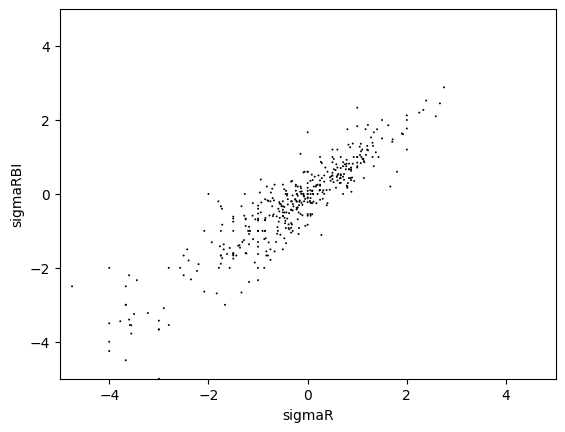

In [39]:
plt.scatter(HCOMP['sigmaR'], HCOMP['sigmaRBI'],facecolor='black',edgecolor='none',s=2.)
plt.xlabel('sigmaR')
plt.ylabel('sigmaRBI')
plt.axis([-5,5,-5,5])
# positive means overpredictions, negative means underpredictions